**ARIMA** **MODEL**

In [1]:
import pandas as pd

file_path = r"/content/IBM.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


                       Price           Adj Close               Close  \
0                     Ticker                 IBM                 IBM   
1                       Date                 NaN                 NaN   
2  2014-08-01 00:00:00+00:00  115.99971771240234   180.8317413330078   
3  2014-08-04 00:00:00+00:00  116.30024719238281  181.30018615722656   
4  2014-08-05 00:00:00+00:00   114.7425537109375  178.87188720703125   

                 High                 Low                Open   Volume  
0                 IBM                 IBM                 IBM      IBM  
1                 NaN                 NaN                 NaN      NaN  
2  183.07839965820312   180.5544891357422  182.12237548828125  5419431  
3   181.5965576171875  180.30592346191406     181.02294921875  2223691  
4  180.87954711914062   178.2409210205078  180.44932556152344  3460063  


In [2]:
df.rename(columns={df.columns[0]: "Date"}, inplace=True)

In [3]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,IBM,IBM,IBM,IBM,IBM,IBM
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-08-01 00:00:00+00:00,115.99971771240234,180.8317413330078,183.07839965820312,180.5544891357422,182.12237548828125,5419431
3,2014-08-04 00:00:00+00:00,116.30024719238281,181.30018615722656,181.5965576171875,180.30592346191406,181.02294921875,2223691
4,2014-08-05 00:00:00+00:00,114.7425537109375,178.87188720703125,180.87954711914062,178.2409210205078,180.44932556152344,3460063


In [4]:
df = df.iloc[2:].reset_index(drop=True)
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-08-01 00:00:00+00:00,115.99971771240234,180.8317413330078,183.07839965820312,180.5544891357422,182.12237548828125,5419431
1,2014-08-04 00:00:00+00:00,116.30024719238281,181.30018615722656,181.5965576171875,180.30592346191406,181.02294921875,2223691
2,2014-08-05 00:00:00+00:00,114.7425537109375,178.87188720703125,180.87954711914062,178.2409210205078,180.44932556152344,3460063
3,2014-08-06 00:00:00+00:00,114.72403717041016,177.7915802001953,178.6615753173828,176.32887268066406,177.2084197998047,4023962
4,2014-08-07 00:00:00+00:00,113.69379425048828,176.1950225830078,178.47036743164062,175.50669860839844,178.43212890625,2833196
...,...,...,...,...,...,...,...
2344,2023-11-22 00:00:00+00:00,149.7177276611328,155.1300048828125,155.7100067138672,154.16000366210938,154.5,3044700
2345,2023-11-24 00:00:00+00:00,149.76596069335938,155.17999267578125,155.39999389648438,153.9199981689453,155.1300048828125,1799200
2346,2023-11-27 00:00:00+00:00,150.14236450195312,155.57000732421875,156.13999938964844,154.75,154.99000549316406,4053100
2347,2023-11-28 00:00:00+00:00,150.21954345703125,155.64999389648438,155.75,154.86000061035156,155.44000244140625,2666200


Inspection of Data

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2349 non-null   object
 1   Adj Close  2349 non-null   object
 2   Close      2349 non-null   object
 3   High       2349 non-null   object
 4   Low        2349 non-null   object
 5   Open       2349 non-null   object
 6   Volume     2349 non-null   object
dtypes: object(7)
memory usage: 128.6+ KB
None
                             Date          Adj Close               Close  \
count                        2349               2349                2349   
unique                       2349               2302                2021   
top     2014-08-01 00:00:00+00:00  98.56166076660156  140.03823852539062   
freq                            1                  3                   5   

                      High                 Low                Open   Volume  
count                 2349           

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2349 non-null   object
 1   Adj Close  2349 non-null   object
 2   Close      2349 non-null   object
 3   High       2349 non-null   object
 4   Low        2349 non-null   object
 5   Open       2349 non-null   object
 6   Volume     2349 non-null   object
dtypes: object(7)
memory usage: 128.6+ KB


In [7]:
df.rename(columns={
    'Open': 'open_price',
    'High': 'high_price',
    'Low': 'low_price',
    'Close': 'close_price',
    'Adj Close': 'adjusted_close',
    'Volume': 'trade_volume'
}, inplace=True)

In [8]:
df.head()

,Date,adjusted_close,close_price,high_price,low_price,open_price,trade_volume
0,2014-08-01 00:00:00+00:00,115.99971771240234,180.8317413330078,183.07839965820312,180.5544891357422,182.12237548828125,5419431
1,2014-08-04 00:00:00+00:00,116.30024719238281,181.30018615722656,181.5965576171875,180.30592346191406,181.02294921875,2223691
2,2014-08-05 00:00:00+00:00,114.7425537109375,178.87188720703125,180.87954711914062,178.2409210205078,180.44932556152344,3460063
3,2014-08-06 00:00:00+00:00,114.72403717041016,177.7915802001953,178.6615753173828,176.32887268066406,177.2084197998047,4023962
4,2014-08-07 00:00:00+00:00,113.69379425048828,176.1950225830078,178.47036743164062,175.50669860839844,178.43212890625,2833196


In [9]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2349 non-null   object
 1   adjusted_close  2349 non-null   object
 2   close_price     2349 non-null   object
 3   high_price      2349 non-null   object
 4   low_price       2349 non-null   object
 5   open_price      2349 non-null   object
 6   trade_volume    2349 non-null   object
dtypes: object(7)
memory usage: 128.6+ KB


Data Types

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.head()

,Date,adjusted_close,close_price,high_price,low_price,open_price,trade_volume
0,2014-08-01 00:00:00+00:00,115.99971771240234,180.8317413330078,183.07839965820312,180.5544891357422,182.12237548828125,5419431
1,2014-08-04 00:00:00+00:00,116.30024719238281,181.30018615722656,181.5965576171875,180.30592346191406,181.02294921875,2223691
2,2014-08-05 00:00:00+00:00,114.7425537109375,178.87188720703125,180.87954711914062,178.2409210205078,180.44932556152344,3460063
3,2014-08-06 00:00:00+00:00,114.72403717041016,177.7915802001953,178.6615753173828,176.32887268066406,177.2084197998047,4023962
4,2014-08-07 00:00:00+00:00,113.69379425048828,176.1950225830078,178.47036743164062,175.50669860839844,178.43212890625,2833196


In [12]:
df['trade_volume'] = pd.to_numeric(df['trade_volume'], errors='coerce').fillna(0).astype(int)

In [13]:
columns_to_convert = ['open_price', 'high_price', 'low_price', 'close_price', 'adjusted_close']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [14]:
df.dtypes

,0
Date,"datetime64[ns, UTC]"
adjusted_close,float64
close_price,float64
high_price,float64
low_price,float64
open_price,float64
trade_volume,int64


In [15]:
df.head()

,Date,adjusted_close,close_price,high_price,low_price,open_price,trade_volume
0,2014-08-01 00:00:00+00:00,115.999718,180.831741,183.078400,180.554489,182.122375,5419431
1,2014-08-04 00:00:00+00:00,116.300247,181.300186,181.596558,180.305923,181.022949,2223691
2,2014-08-05 00:00:00+00:00,114.742554,178.871887,180.879547,178.240921,180.449326,3460063
3,2014-08-06 00:00:00+00:00,114.724037,177.791580,178.661575,176.328873,177.208420,4023962
4,2014-08-07 00:00:00+00:00,113.693794,176.195023,178.470367,175.506699,178.432129,2833196


Outliers

In [16]:
# IQR METHOD
import pandas as pd

# For numeric columns only (excluding date column)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1, Q3, and IQR for each column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers for each column
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Count outliers per column
outliers_count = outliers.sum()

print(f"Outliers count per column:\n{outliers_count}")


Outliers count per column:
adjusted_close     30
close_price        58
high_price         55
low_price          62
open_price         59
trade_volume      159
dtype: int64


In [17]:
# Z score method.
from scipy import stats

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the Z-scores for each numeric column
z_scores = stats.zscore(df[numeric_columns])

# Identify outliers as rows where Z-score is greater than 3 or less than -3
outliers = (z_scores > 2) | (z_scores < -2)

# Count outliers per column
outliers_count = outliers.sum()

print(f"Outliers count per column:\n{outliers_count}")


Outliers count per column:
adjusted_close    140
close_price       106
high_price        109
low_price         111
open_price        109
trade_volume       80
dtype: int64


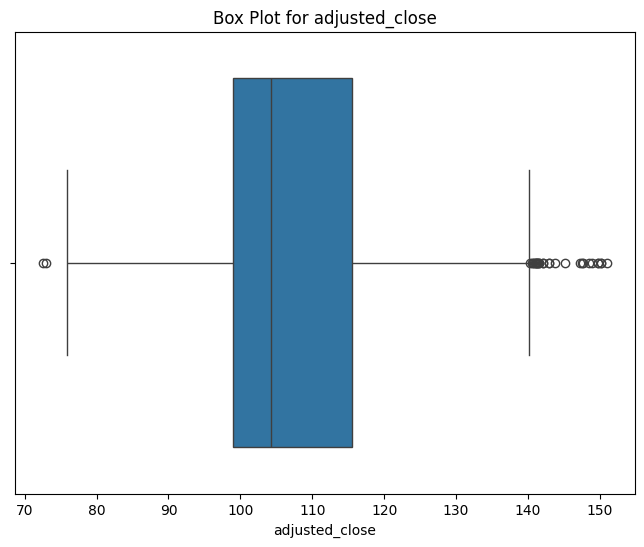

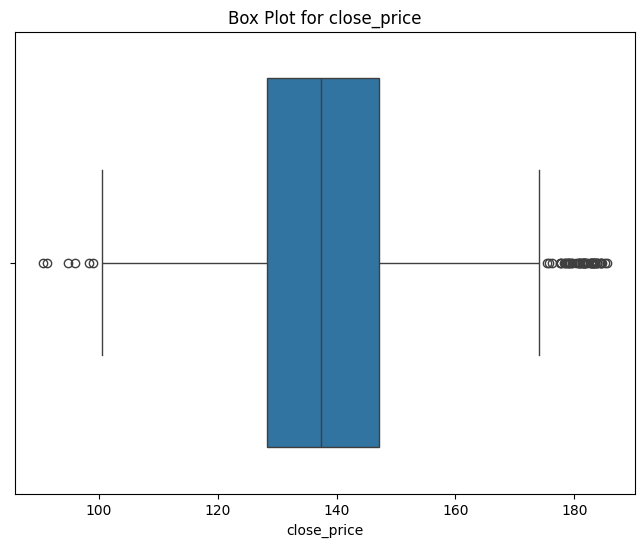

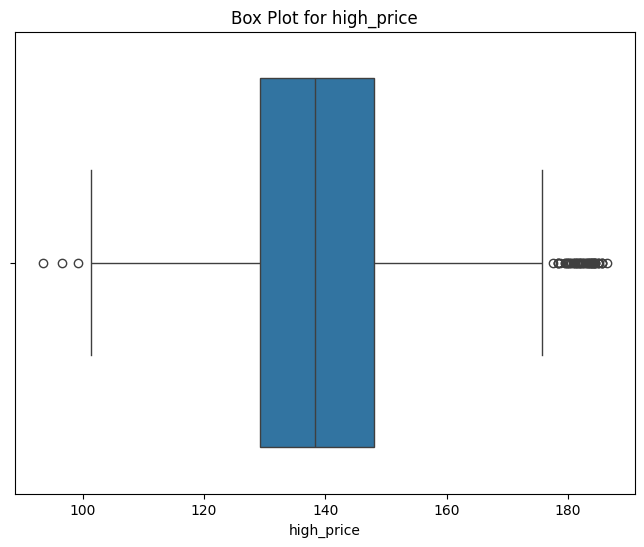

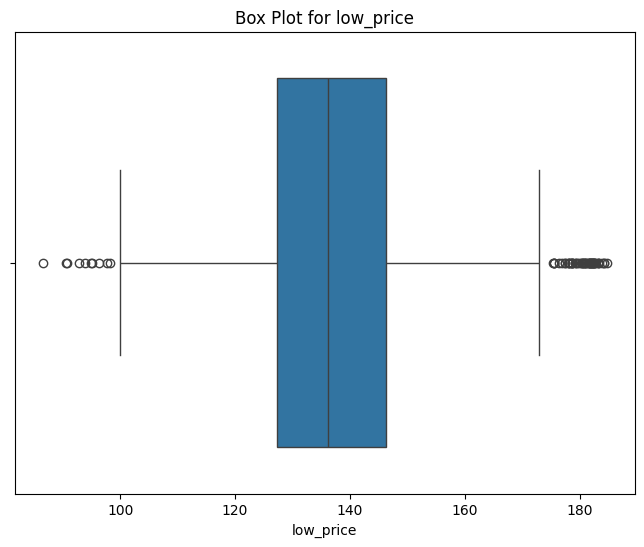

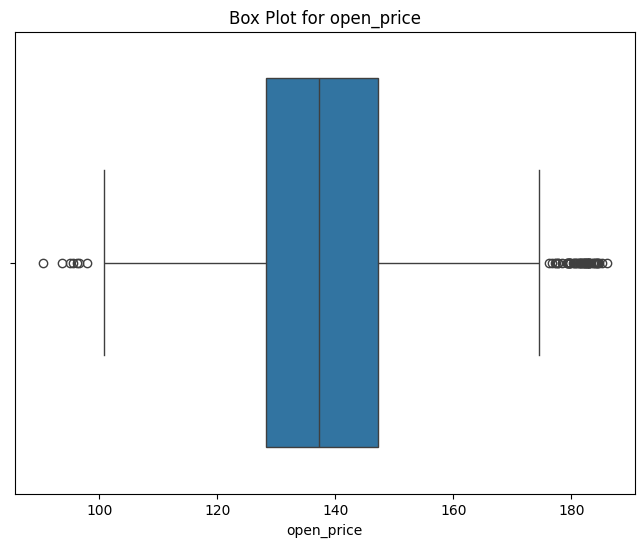

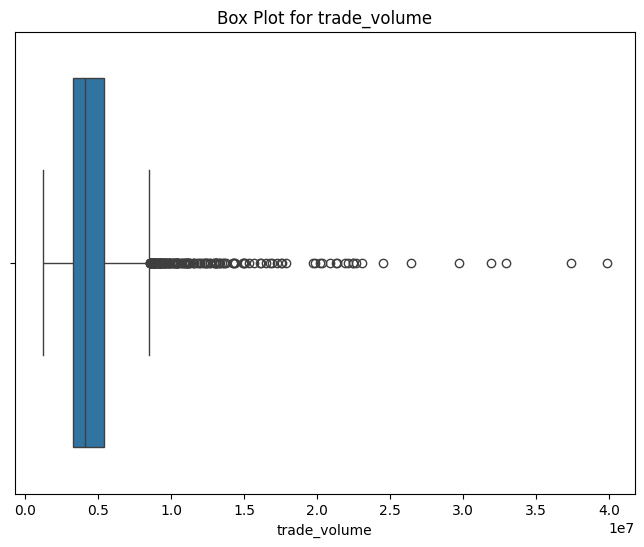

In [18]:
# Visual Analysis using Box Plot.
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot for {column}")
    plt.show()



In [19]:
print(f"Original DataFrame shape: {df.shape}")

Original DataFrame shape: (2349, 7)


In [20]:
# # Filter the DataFrame to remove rows with outliers
# df_no_outliers = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# # Check the shape before and after outlier removal
# print(f"Original DataFrame shape: {df.shape}")
# print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")

# Define the numeric columns
numeric_columns = ['adjusted_close', 'close_price', 'high_price', 'low_price', 'open_price']

# Calculate lower and upper bounds based on percentiles
lower_bound = df[numeric_columns].quantile(0.01)
upper_bound = df[numeric_columns].quantile(0.99)

# Display the bounds
print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)

# Remove outliers based on the bounds
df_no_outliers = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# Check the shape before and after outlier removal
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")


Lower Bound:
 adjusted_close     80.438094
close_price       107.592353
high_price        108.814147
low_price         105.305162
open_price        107.079158
Name: 0.01, dtype: float64
Upper Bound:
 adjusted_close    140.856027
close_price       181.726198
high_price        182.940726
low_price         181.107070
open_price        182.048950
Name: 0.99, dtype: float64
Original DataFrame shape: (2349, 7)
DataFrame shape after outlier removal: (2254, 7)


In [21]:
df = df_no_outliers

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 1 to 2330
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Date            2254 non-null   datetime64[ns, UTC]
 1   adjusted_close  2254 non-null   float64            
 2   close_price     2254 non-null   float64            
 3   high_price      2254 non-null   float64            
 4   low_price       2254 non-null   float64            
 5   open_price      2254 non-null   float64            
 6   trade_volume    2254 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 140.9 KB


In [23]:
df.head()

,Date,adjusted_close,close_price,high_price,low_price,open_price,trade_volume
1,2014-08-04 00:00:00+00:00,116.300247,181.300186,181.596558,180.305923,181.022949,2223691
2,2014-08-05 00:00:00+00:00,114.742554,178.871887,180.879547,178.240921,180.449326,3460063
3,2014-08-06 00:00:00+00:00,114.724037,177.791580,178.661575,176.328873,177.208420,4023962
4,2014-08-07 00:00:00+00:00,113.693794,176.195023,178.470367,175.506699,178.432129,2833196
5,2014-08-08 00:00:00+00:00,115.131180,178.422562,178.460800,175.506699,176.290634,2909449


Analyzing Trends and Seasonality

Visual Inspection

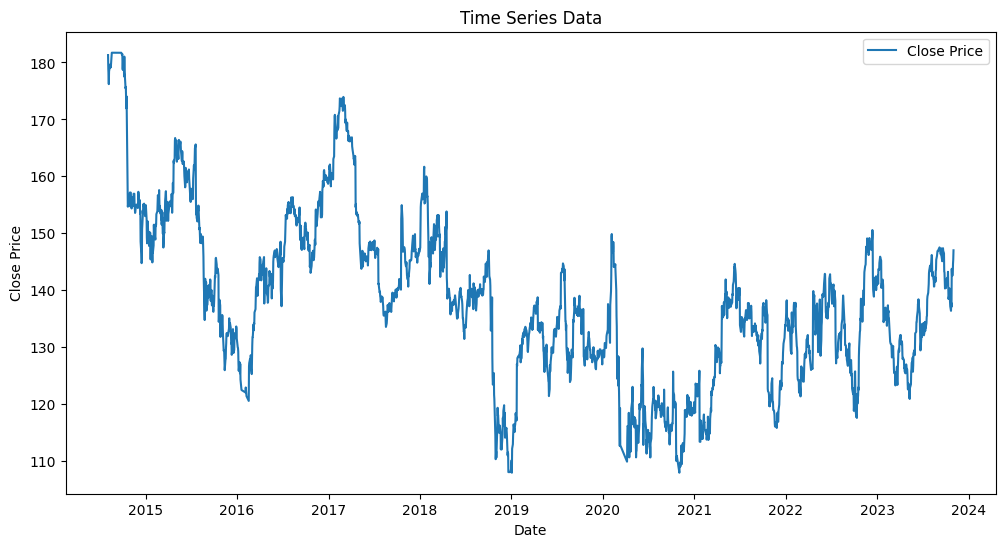

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['close_price'], label='Close Price')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Seasonal Decomposition

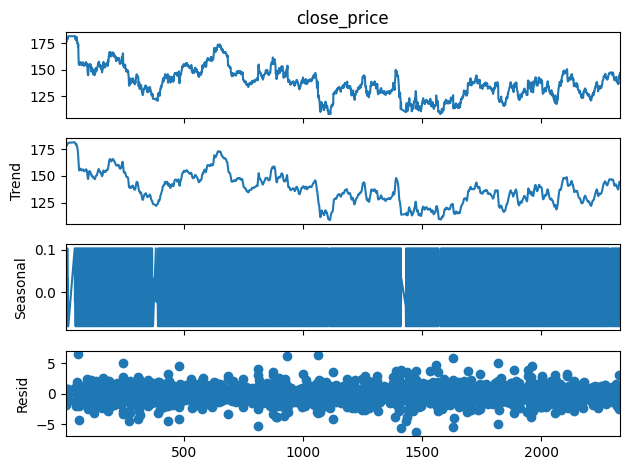

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming 'date' is already in datetime format and set as index
# df['Date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# Decompose the time series (additive model)
decomposition = seasonal_decompose(df['close_price'], model='additive', period=5)
decomposition.plot()
plt.show()


ADF Test

In [26]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['close_price'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -3.9388761787306854
P-value: 0.0017666565493139536
The series is stationary.


Differencing

In [27]:
# # Apply first-order differencing
# df.loc[:, 'close_price_diff'] = df.loc[:, 'close_price'].diff()

# # Plot the differenced data
# df['close_price_diff'].dropna().plot(title="Differenced Close Price")
# plt.show()


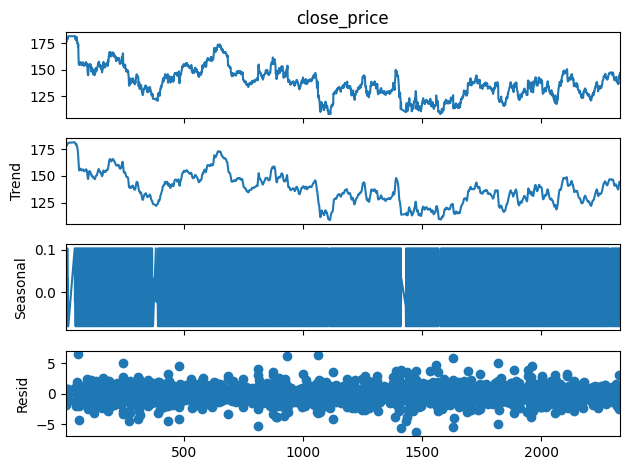

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming 'date' is already in datetime format and set as index
# df['Date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# Decompose the time series (additive model)
decomposition = seasonal_decompose(df['close_price'], model='additive', period=5)
decomposition.plot()
plt.show()


In [29]:
# from statsmodels.graphics.tsaplots import plot_acf

# plot_acf(df['close_price_sea'].dropna(), lags=20)
# plt.show()


In [30]:
# # Apply seasonal differencing (if seasonality detected)
# seasonal_period = 5  # For monthly data, it's 12 months
# df['close_price_seasonal_diff'] = df['close_price'] - df['close_price'].shift(seasonal_period)

# # Plot the seasonally differenced data
# df['close_price_seasonal_diff'].dropna().plot(title="Seasonally Differenced Close Price")
# plt.show()


In [31]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # # Assuming 'date' is already in datetime format and set as index
# # df['Date'] = pd.to_datetime(df['date'])
# # df.set_index('date', inplace=True)

# # Decompose the time series (additive model)
# decomposition = seasonal_decompose(df['close_price_seasonal_diff'], model='additive', period=5)
# decomposition.plot()
# plt.show()


In [32]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # # Assuming 'date' is already in datetime format and set as index
# # df['Date'] = pd.to_datetime(df['date'])
# # df.set_index('date', inplace=True)

# # Decompose the time series (additive model)
# decomposition = seasonal_decompose(df['close_price_seasonal_diff'], model='pseudo-additive', period=12)
# decomposition.plot()
# plt.show()


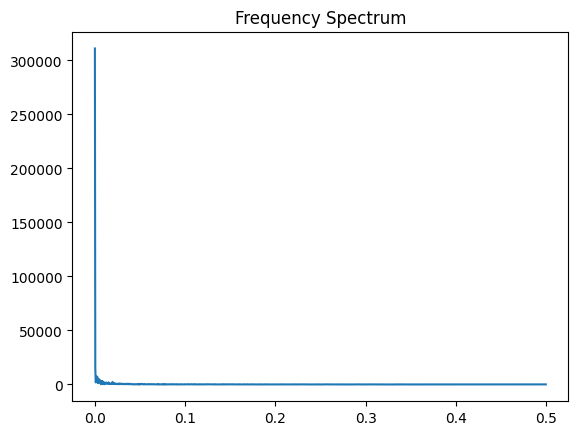

In [33]:
import numpy as np

fft = np.fft.fft(df['close_price'].dropna())
freqs = np.fft.fftfreq(len(fft))
plt.plot(freqs[:len(freqs)//2], np.abs(fft)[:len(fft)//2])
plt.title("Frequency Spectrum")
plt.show()


AArima Model Building

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 1 to 2330
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Date            2254 non-null   datetime64[ns, UTC]
 1   adjusted_close  2254 non-null   float64            
 2   close_price     2254 non-null   float64            
 3   high_price      2254 non-null   float64            
 4   low_price       2254 non-null   float64            
 5   open_price      2254 non-null   float64            
 6   trade_volume    2254 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 140.9 KB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 1 to 2330
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Date            2254 non-null   datetime64[ns, UTC]
 1   adjusted_close  2254 non-null   float64            
 2   close_price     2254 non-null   float64            
 3   high_price      2254 non-null   float64            
 4   low_price       2254 non-null   float64            
 5   open_price      2254 non-null   float64            
 6   trade_volume    2254 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 140.9 KB


In [36]:
df.set_index('Date', inplace=True)

In [41]:
len(df[2054:])

200

In general after differencing we get NaN for first value as it has no previous value.

In [42]:

# Split the data into train and test sets (90% train, 10% test)
# train_size = int(len(df) * 0.9)
train, test = df[:2054], df[2054:]

# Check the first few rows of train and test sets
print(f"Train data:\n{train.tail()}")
print(f"Test data:\n{test.head()}")


Train data:
                           adjusted_close  close_price  high_price  \
Date                                                                 
2023-01-03 00:00:00+00:00      130.147705   141.550003  141.899994   
2023-01-04 00:00:00+00:00      131.113129   142.600006  143.619995   
2023-01-05 00:00:00+00:00      129.743149   141.110001  142.500000   
2023-01-06 00:00:00+00:00      132.124512   143.699997  144.250000   
2023-01-09 00:00:00+00:00      131.986588   143.550003  145.470001   

                            low_price  open_price  trade_volume  
Date                                                             
2023-01-03 00:00:00+00:00  140.479996  141.100006       3338600  
2023-01-04 00:00:00+00:00  141.369995  142.070007       3869200  
2023-01-05 00:00:00+00:00  140.009995  142.440002       2866600  
2023-01-06 00:00:00+00:00  141.580002  142.380005       3574000  
2023-01-09 00:00:00+00:00  143.399994  144.080002       3987700  
Test data:
                        

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [44]:
time_series = df

<Figure size 1000x600 with 0 Axes>

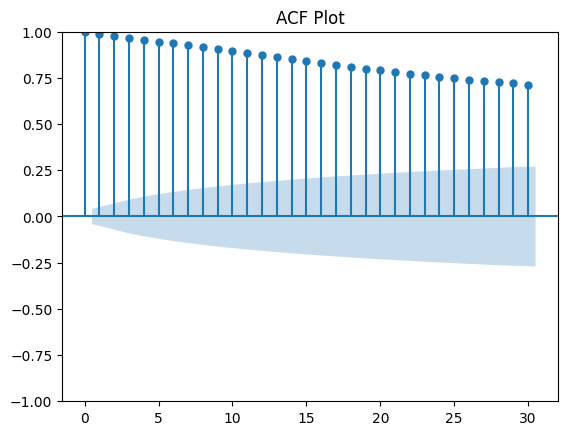

<Figure size 1000x600 with 0 Axes>

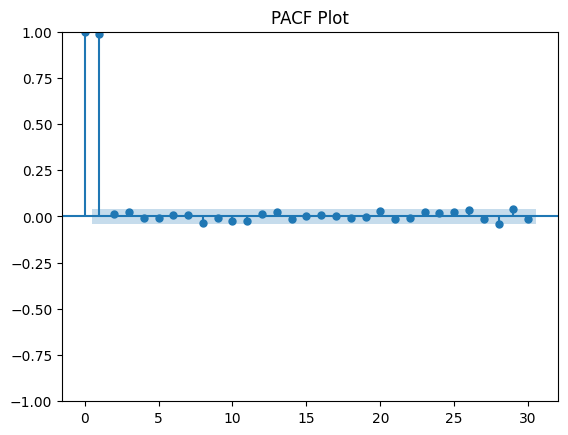

In [45]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'series' is your time series data (after any necessary differencing or transformation)
series = df['close_price']  # Replace with the column you're interested in

# # Plot ACF and PACF to visualize the optimal lag
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # ACF plot (autocorrelation)
# plot_acf(series, ax=axes[0], lags=90)
# axes[0].set_title('ACF Plot')

# # PACF plot (partial autocorrelation)
# plot_pacf(series, ax=axes[1], lags=90, method='ywm')
# axes[1].set_title('PACF Plot')

# plt.show()
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(series, lags=30)  # Adjust the lags parameter as needed
plt.title('ACF Plot')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(series, lags=30)  # Adjust the lags parameter as needed
plt.title('PACF Plot')
plt.show()

In [46]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.stattools import acf, pacf

# # Assuming 'stationary_series' is the differenced series after removing NaN
stationary_series = df['close_price'].dropna()

# Calculate ACF and PACF values
acf_values = acf(stationary_series, nlags=50)  # Adjust nlags as needed
pacf_values = pacf(stationary_series, nlags=50)

# # Plot ACF
# plt.figure(figsize=(10, 6))
# plot_acf(stationary_series, lags=95)
# plt.title("ACF Plot")
# plt.show()

# # Plot PACF
# plt.figure(figsize=(10, 6))
# plot_pacf(stationary_series, lags=95)
# plt.title("PACF Plot")
# plt.show()

# Find the cutoff for p (AR) from PACF
p_cutoff = next((i for i, val in enumerate(pacf_values) if abs(val) < 1.96 / (len(stationary_series)**0.5)), len(pacf_values))

# Find the cutoff for q (MA) from ACF
q_cutoff = next((i for i, val in enumerate(acf_values) if abs(val) < 1.96 / (len(stationary_series)**0.5)), len(acf_values))

print(f"Suggested p (AR order): {p_cutoff}")
print(f"Suggested q (MA order): {q_cutoff}")


Suggested p (AR order): 2
Suggested q (MA order): 51


Bayseion Information Crieterion

In [47]:
# import warnings
# from statsmodels.tsa.arima.model import ARIMA
# import pandas as pd

# # Suppress warnings for non-converging models
# warnings.filterwarnings("ignore")

# # Define the range of parameters to search
# p_values = range(0, 9)  # Test p from 0 to 4
# q_values = range(0, 9)  # Test q from 0 to 4

# # Assume 'stationary_series' is your differenced series
# stationary_series = df['close_price'].dropna()

# # DataFrame to store results
# results = []

# # Grid search across parameter combinations
# for p in p_values:
#         for q in q_values:
#             try:
#                 # Fit the ARIMA model
#                 model = ARIMA(stationary_series, order=(p, 0, q))
#                 model_fit = model.fit()

#                 # Append the parameters and BIC score
#                 results.append((p, 0, q, model_fit.bic, model_fit.aic))
#             except:
#                 # If the model fails, skip it
#                 continue

# # Convert results to a DataFrame for easy viewing
# results_df = pd.DataFrame(results, columns=["p", "d", "q", "BIC", "AIC"])
import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Suppress warnings for non-converging models
warnings.filterwarnings("ignore")

# Define the range of parameters to search
p_values = range(1, 5)  # Test p from 0 to 4
q_values = range(0, 9)  # Test q from 0 to 4

# Assume 'stationary_series' is your differenced series
stationary_series = df['close_price'].dropna()

# DataFrame to store results
results = []

# Grid search across parameter combinations
for p in p_values:
        for q in q_values:
            try:
                # Fit the ARIMA model
                model = ARIMA(stationary_series, order=(p, 0, q))
                model_fit = model.fit()

                # Append the parameters and BIC score
                results.append((p, 0, q, model_fit.bic))
            except:
                # If the model fails, skip it
                continue

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["p", "d", "q", "BIC"])

# Find the best parameters (lowest BIC)
best_params = results_df.loc[results_df["BIC"].idxmin()]

print(f"Optimal parameters: p={best_params['p']}, d={best_params['d']}, q={best_params['q']}")
print(f"Lowest BIC: {best_params['BIC']}")

# Display all results sorted by BIC
print(results_df.sort_values(by="BIC"))


Optimal parameters: p=1.0, d=0.0, q=0.0
Lowest BIC: 9303.603992913797
    p  d  q          BIC
0   1  0  0  9303.603993
1   1  0  1  9311.267892
9   2  0  0  9311.270619
10  2  0  1  9317.650687
2   1  0  2  9317.689725
18  3  0  0  9317.959452
27  4  0  0  9324.262254
11  2  0  2  9324.435875
19  3  0  1  9324.475780
3   1  0  3  9324.593609
20  3  0  2  9326.632543
4   1  0  4  9331.930154
28  4  0  1  9332.035927
12  2  0  3  9332.301831
21  3  0  3  9333.796019
22  3  0  4  9335.633778
29  4  0  2  9336.730105
5   1  0  5  9338.991604
13  2  0  4  9339.942787
30  4  0  3  9340.137417
23  3  0  5  9343.216361
6   1  0  6  9346.656374
14  2  0  5  9347.106662
32  4  0  5  9349.011917
24  3  0  6  9350.142357
31  4  0  4  9350.359260
7   1  0  7  9351.268366
15  2  0  6  9353.917060
33  4  0  6  9357.021819
16  2  0  7  9357.800355
8   1  0  8  9358.572671
17  2  0  8  9365.518951
25  3  0  7  9366.214258
34  4  0  7  9369.570842
26  3  0  8  9373.216905
35  4  0  8  9378.529676


Model Fitting

In [48]:
from statsmodels.tsa.arima.model import ARIMA
p = 1
q = 0
d = 0
# Build ARIMA model using training data (train)
model = ARIMA(train['close_price'], order=(p, d, q))

# Fit the ARIMA model to the training data
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:            close_price   No. Observations:                 2054
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -4271.591
Date:                Mon, 02 Dec 2024   AIC                           8549.182
Time:                        13:53:50   BIC                           8566.064
Sample:                             0   HQIC                          8555.372
                               - 2054                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.0578      4.612     30.584      0.000     132.018     150.097
ar.L1          0.9926      0.002    475.493      0.000       0.988       0.997
sigma2         3.7410      0.056     67.083      0.0

In [49]:
# Forecast on the test set using the trained ARIMA model
forecast = arima_result.forecast(steps=len(test))

# Compare forecasted values with actual values
forecast_values = forecast



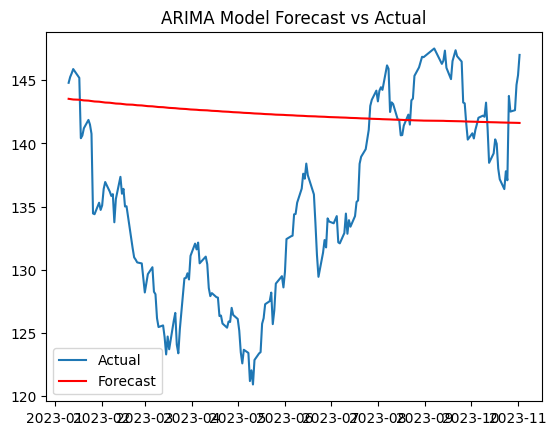

In [50]:
# Forecast on the test set using the trained ARIMA model
forecast = arima_result.forecast(steps=len(test))

# Compare forecasted values with actual values
forecast_values = forecast

# Visualize forecast vs actual values

plt.plot(test.index, test['close_price'], label='Actual')  # Actual values from the test set
plt.plot(test.index, forecast_values, label='Forecast', color='red')  # Forecasted values
plt.legend()
plt.title('ARIMA Model Forecast vs Actual')
plt.show()


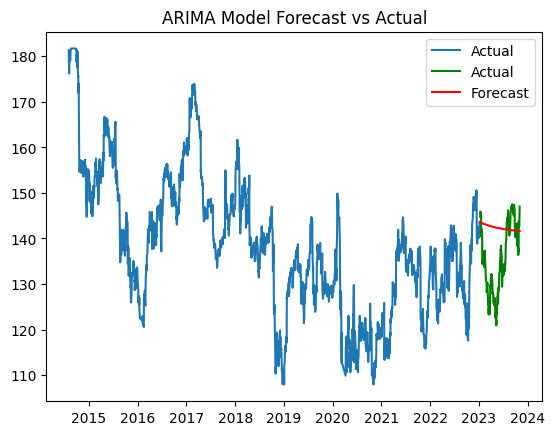

In [51]:
# Visualize forecast vs actual values
plt.plot(train.index, train['close_price'], label='Actual')  # Actual values from the test set
plt.plot(test.index, test['close_price'], color='green', label='Actual')  # Actual values from the test set
plt.plot(test.index, forecast_values, label='Forecast', color='red')  # Forecasted values
plt.legend()
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(test['close_price'], forecast_values)
rmse = np.sqrt(mean_squared_error(test['close_price'], forecast_values))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 8.44155977936873
RMSE: 10.395647059733687


**LSTM MODEL**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2254 entries, 2014-08-04 00:00:00+00:00 to 2023-11-02 00:00:00+00:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adjusted_close  2254 non-null   float64
 1   close_price     2254 non-null   float64
 2   high_price      2254 non-null   float64
 3   low_price       2254 non-null   float64
 4   open_price      2254 non-null   float64
 5   trade_volume    2254 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.3 KB


In [54]:
df.dtypes

,0
adjusted_close,float64
close_price,float64
high_price,float64
low_price,float64
open_price,float64
trade_volume,int64


Feature Engineering

In [55]:
df.loc[:, 'MA_5'] = df['close_price'].rolling(window=5).mean()  # 5-day Moving Average
df.loc[:, 'MA_10'] = df['close_price'].rolling(window=10).mean()  # 10-day Moving Average

In [56]:
# 2. Exponential Moving Averages (EMA)
df.loc[:, 'EMA_5'] = df['close_price'].ewm(span=5, adjust=False).mean()  # 5-day EMA
df.loc[:, 'EMA_10'] = df['close_price'].ewm(span=10, adjust=False).mean()  # 10-day EMA


In [57]:
# 3. Daily Range (High - Low)
df.loc[:, 'Daily_Range'] = df.loc[:, 'high_price'] - df.loc[:, 'low_price']  # Daily price range

In [58]:
# 4. Volatility (Rolling Standard Deviation of Close)
df.loc[:, 'Volatility_5'] = df.loc[:, 'close_price'].rolling(window=5).std()  # 5-day rolling volatility
df.loc[:, 'Volatility_10'] = df.loc[:, 'close_price'].rolling(window=10).std()  # 10-day rolling volatility

In [59]:
df.head()

,adjusted_close,close_price,high_price,low_price,open_price,trade_volume,MA_5,MA_10,EMA_5,EMA_10,Daily_Range,Volatility_5,Volatility_10
Date,,,,,,,,,,,,,
2014-08-04 00:00:00+00:00,116.300247,181.300186,181.596558,180.305923,181.022949,2223691,NaN,NaN,181.300186,181.300186,1.290634,NaN,NaN
2014-08-05 00:00:00+00:00,114.742554,178.871887,180.879547,178.240921,180.449326,3460063,NaN,NaN,180.490753,180.858677,2.638626,NaN,NaN
2014-08-06 00:00:00+00:00,114.724037,177.791580,178.661575,176.328873,177.208420,4023962,NaN,NaN,179.591029,180.301023,2.332703,NaN,NaN
2014-08-07 00:00:00+00:00,113.693794,176.195023,178.470367,175.506699,178.432129,2833196,NaN,NaN,178.459027,179.554478,2.963669,NaN,NaN
2014-08-08 00:00:00+00:00,115.131180,178.422562,178.460800,175.506699,176.290634,2909449,178.516248,NaN,178.446872,179.348675,2.954102,1.857337,NaN


In [60]:
df = df.dropna()
df

,adjusted_close,close_price,high_price,low_price,open_price,trade_volume,MA_5,MA_10,EMA_5,EMA_10,Daily_Range,Volatility_5,Volatility_10
Date,,,,,,,,,,,,,
2014-08-15 00:00:00+00:00,115.593864,179.139572,180.573608,178.575531,179.588913,2944281,179.353723,178.934985,179.237197,179.356877,1.998077,0.276141,1.327371
2014-08-18 00:00:00+00:00,116.815315,181.032501,181.462708,179.502869,179.827911,2531634,179.715100,178.908217,179.835632,179.661536,1.959839,0.783252,1.276082
2014-08-19 00:00:00+00:00,117.253296,181.711288,181.883362,181.032501,181.682602,2133945,180.237091,179.192157,180.460851,180.034218,0.850861,1.083930,1.552959
2014-09-26 00:00:00+00:00,117.247200,181.701721,181.959854,180.315491,180.621414,2608619,180.640533,179.583171,180.874474,180.337401,1.644363,1.196410,1.650337
2014-09-29 00:00:00+00:00,116.988037,181.300186,181.606125,179.847031,180.219879,2443770,180.977054,180.093687,181.016378,180.512453,1.759094,1.066310,1.219054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-27 00:00:00+00:00,136.005219,142.520004,144.699997,141.710007,143.619995,5469200,139.506000,139.220001,140.614120,140.038955,2.989990,3.383145,2.442039
2023-10-30 00:00:00+00:00,136.110184,142.630005,144.500000,142.580002,143.190002,4204100,140.756000,139.562001,141.286082,140.510055,1.919998,3.080493,2.669381
2023-10-31 00:00:00+00:00,138.028290,144.639999,144.759995,142.589996,143.000000,6591800,142.126001,139.994000,142.404054,141.260954,2.169998,2.952181,3.117613


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2245 entries, 2014-08-15 00:00:00+00:00 to 2023-11-02 00:00:00+00:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adjusted_close  2245 non-null   float64
 1   close_price     2245 non-null   float64
 2   high_price      2245 non-null   float64
 3   low_price       2245 non-null   float64
 4   open_price      2245 non-null   float64
 5   trade_volume    2245 non-null   int64  
 6   MA_5            2245 non-null   float64
 7   MA_10           2245 non-null   float64
 8   EMA_5           2245 non-null   float64
 9   EMA_10          2245 non-null   float64
 10  Daily_Range     2245 non-null   float64
 11  Volatility_5    2245 non-null   float64
 12  Volatility_10   2245 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 245.5 KB


Data Visualization

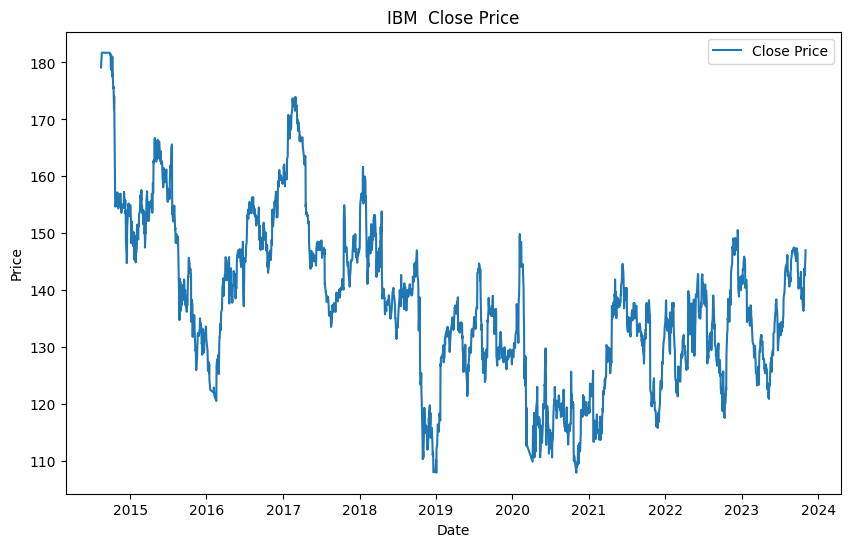

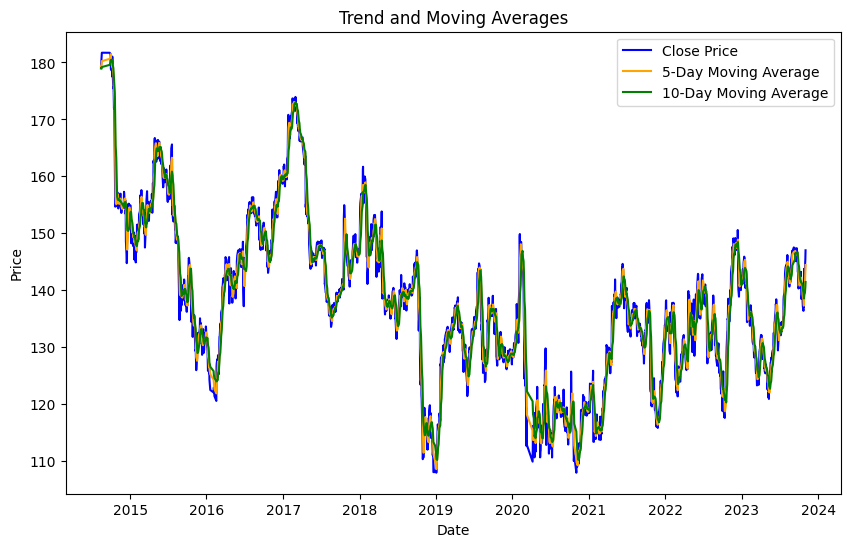

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting  close price
plt.figure(figsize=(10, 6))
plt.plot(df['close_price'], label='Close Price')
plt.title('IBM  Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting moving averages to capture trend
plt.figure(figsize=(10, 6))
plt.plot(df['close_price'], label='Close Price', color='blue')
plt.plot(df['MA_5'], label='5-Day Moving Average', color='orange')
plt.plot(df['MA_10'], label='10-Day Moving Average', color='green')
plt.title('Trend and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


LSTM DATA FORMAT

In [63]:
import numpy as np

def create_sequences(df, time_steps=30, target_column='close_price'):

    # Get target column index before converting to numpy
    target_idx = df.columns.get_loc(target_column)

    # Convert DataFrame to numpy array
    df_as_np = df.values

    # Initialize empty lists for sequences and targets
    X = []
    y = []

    # Create sequences
    for i in range(len(df_as_np) - time_steps):
        # Extract sequence of all features
        sequence = df_as_np[i:(i + time_steps)]
        X.append(sequence)

        # Extract target value (next value after sequence)
        target = df_as_np[i + time_steps][target_idx]
        y.append(target)

    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

# Usage example
time_steps = 30  # You can adjust this (5, 7, or 10 for daily data as suggested)
X, y = create_sequences(df, time_steps=time_steps, target_column='close_price')

# Print shapes
print(f"X shape: {X.shape}")  # Will be (samples, time_steps, features)
print(f"y shape: {y.shape}")  # Will be (samples,)

X shape: (2215, 30, 13)
y shape: (2215,)


In [64]:
X3_train, y3_train = X[:2015], y[:2015]
# X3_val, y3_val = X[1950:2019], y[1950:2019]
X3_test, y3_test = X[2015:], y[2015:]
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((2015, 30, 13), (2015,), (200, 30, 13), (200,))

Data Normalization

In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def normalize_lstm_data(X_train, X_test, y_train,  y_test):
    """
    Normalize time series data using MinMaxScaler.
    Fits scaler on training data only to prevent data leakage.

    Parameters:
    X_train, X_val, X_test: 3D arrays of shape (samples, time_steps, features)
    y_train, y_val, y_test: 1D arrays of target values

    Returns:
    Normalized X and y data, plus the fitted scalers for inverse transformation
    """
    # Initialize scalers
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Get the number of features and time steps
    n_samples_train, time_steps, n_features = X_train.shape

    # Reshape training data to 2D for scaling
    X_train_reshaped = X_train.reshape(n_samples_train * time_steps, n_features)

    # Fit and transform the training data
    X_train_scaled = feature_scaler.fit_transform(X_train_reshaped)

    # Reshape back to 3D
    X_train_normalized = X_train_scaled.reshape(n_samples_train, time_steps, n_features)

    # # Transform validation data
    # n_samples_val = X_val.shape[0]
    # X_val_reshaped = X_val.reshape(n_samples_val * time_steps, n_features)
    # X_val_scaled = feature_scaler.transform(X_val_reshaped)
    # X_val_normalized = X_val_scaled.reshape(n_samples_val, time_steps, n_features)

    # Transform test data
    n_samples_test = X_test.shape[0]
    X_test_reshaped = X_test.reshape(n_samples_test * time_steps, n_features)
    X_test_scaled = feature_scaler.transform(X_test_reshaped)
    X_test_normalized = X_test_scaled.reshape(n_samples_test, time_steps, n_features)

    # Normalize target values
    y_train_normalized = target_scaler.fit_transform(y_train.reshape(-1, 1))
    # y_val_normalized = target_scaler.transform(y_val.reshape(-1, 1))
    y_test_normalized = target_scaler.transform(y_test.reshape(-1, 1))

    return (X_train_normalized,  X_test_normalized,
            y_train_normalized.ravel(),  y_test_normalized.ravel(),
            feature_scaler, target_scaler)

In [66]:

(X3_train_norm, X3_test_norm, y3_train_norm,  y3_test_norm, feature_scaler, target_scaler) = normalize_lstm_data(X3_train, X3_test,y3_train,  y3_test)

# Print shapes to verify
print("Normalized data shapes:")
print(f"X_train: {X3_train_norm.shape}")
# print(f"X_val: {X3_val_norm.shape}")
print(f"X_test: {X3_test_norm.shape}")
print(f"y_train: {y3_train_norm.shape}")
# print(f"y_val: {y3_val_norm.shape}")
print(f"y_test: {y3_test_norm.shape}")

# Optional: Print value ranges to verify normalization
print("\nValue ranges:")
print(f"X_train range: [{X3_train_norm.min():.3f}, {X3_train_norm.max():.3f}]")
print(f"y_train range: [{y3_train_norm.min():.3f}, {y3_train_norm.max():.3f}]")

Normalized data shapes:
X_train: (2015, 30, 13)
X_test: (200, 30, 13)
y_train: (2015,)
y_test: (200,)

Value ranges:
X_train range: [0.000, 1.000]
y_train range: [0.000, 1.000]


LSTM Architecture

In [67]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam


# model5 = Sequential()
# model5.add(InputLayer((7, 6)))
# model5.add(LSTM(64))
# model5.add(Dense(8, 'relu'))
# model5.add(Dense(1, 'linear'))

# model5.summary()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, InputLayer

model5 = Sequential()
# model5.add(InputLayer((30, 7)))  # Input shape is (timesteps, features)
# model5.add(LSTM(50,return_sequences=True, input_shape= (5,14)))
# model5.add(Dropout(0.2))  # Dropout layer

# model5.add(LSTM(50,return_sequences=False))
# model5.add(Dropout(0.2))  # Dropout layer
# model5.add(Dense(25, activation='relu'))
# model5.add(Dense(1, activation='linear'))
# # Input layer
model5.add(InputLayer((30, 13)))  # Input shape is (timesteps, features)

# First LSTM layer
model5.add(LSTM(64, return_sequences=True))  # return_sequences=True to feed output to the next LSTM
model5.add(Dropout(0.2))  # Dropout layer
# model5.add(BatchNormalization())  # Batch Normalization layer

# Second LSTM layer
model5.add(LSTM(32, return_sequences=True))  # return_sequences=True for the same reason as above
model5.add(Dropout(0.3))  # Dropout layer
# model5.add(BatchNormalization())  # Batch Normalization layer

# Third LSTM layer
model5.add(LSTM(32))  # Last LSTM layer, no need to return sequences as we only want the final output
model5.add(Dropout(0.3))  # Dropout layer
# model5.add(BatchNormalization())  # Batch Normalization layer

# Fully connected (Dense) layers
model5.add(Dense(16, activation='relu'))
model5.add(Dense(8, activation='relu'))  # Dense layer with ReLU activation
# Dense layer with ReLU activation
model5.add(Dense(1, activation='linear'))  # Output layer with linear activation

# # Compile the model (you can adjust optimizer and loss as needed)
model5.compile(optimizer='adam', loss='mse')
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,377 (161.63 KB)

 Trainable params: 41,377 (161.63 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow
cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=['RootMeanSquaredError'])

In [69]:
model5.fit(X3_train_norm, y3_train_norm, epochs=20, callbacks=[cp1])

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - RootMeanSquaredError: 0.2690 - loss: 0.0794
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - RootMeanSquaredError: 0.1054 - loss: 0.0111
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - RootMeanSquaredError: 0.0958 - loss: 0.0092
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - RootMeanSquaredError: 0.0898 - loss: 0.0081
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - RootMeanSquaredError: 0.0844 - loss: 0.0071
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - RootMeanSquaredError: 0.0797 - loss: 0.0064
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - RootMeanSquaredError: 0.0741 - loss: 0.0055
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - RootMeanSquaredError: 0.0784 - loss: 0.0062
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - RootMeanSquaredError: 0.0712 - loss: 0.0051
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - RootMeanSquaredError: 0.0655 - loss: 0.0043
Epoch 11/20
63/63 ━━━━━━━━

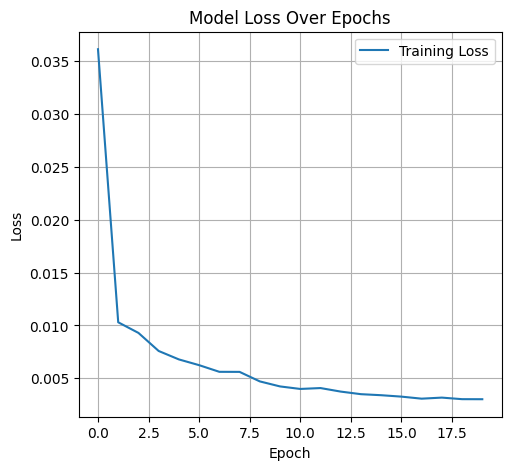

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training history
plt.figure(figsize=(12, 5))

# Plot 1: Training History
plt.subplot(1, 2, 1)
plt.plot(model5.history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Validation Set

In [71]:
# val_predictions = model5.predict(X3_val_norm).flatten()
# #Inverse
# val_predictions_orig = target_scaler.inverse_transform(val_predictions.reshape(-1,1))
# y3_val_orig = target_scaler.inverse_transform(y3_val_norm.reshape(-1, 1))
# #Plotting
# plt.plot(df.index[1950:2019], val_predictions_orig)
# plt.plot(df.index[1950:2019], y3_val_orig)
# plt.legend(['Validation Predictions', 'Validation Observations'])

Test Set

In [72]:
# Calculate the starting indices for each sequence in X3_test
test_indices = np.arange(2015, 2015 + len(X3_test))

# Convert them to the corresponding DataFrame index (the dates in the original DataFrame)
test_df_indexes = df.index[test_indices]

# Print the resulting indexes
print(test_df_indexes)


DatetimeIndex(['2022-12-01 00:00:00+00:00', '2022-12-02 00:00:00+00:00',
               '2022-12-05 00:00:00+00:00', '2022-12-06 00:00:00+00:00',
               '2022-12-07 00:00:00+00:00', '2022-12-08 00:00:00+00:00',
               '2022-12-09 00:00:00+00:00', '2022-12-12 00:00:00+00:00',
               '2022-12-13 00:00:00+00:00', '2022-12-14 00:00:00+00:00',
               ...
               '2023-09-13 00:00:00+00:00', '2023-09-14 00:00:00+00:00',
               '2023-09-15 00:00:00+00:00', '2023-09-18 00:00:00+00:00',
               '2023-09-19 00:00:00+00:00', '2023-09-21 00:00:00+00:00',
               '2023-09-22 00:00:00+00:00', '2023-09-25 00:00:00+00:00',
               '2023-09-26 00:00:00+00:00', '2023-09-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=200, freq=None)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step


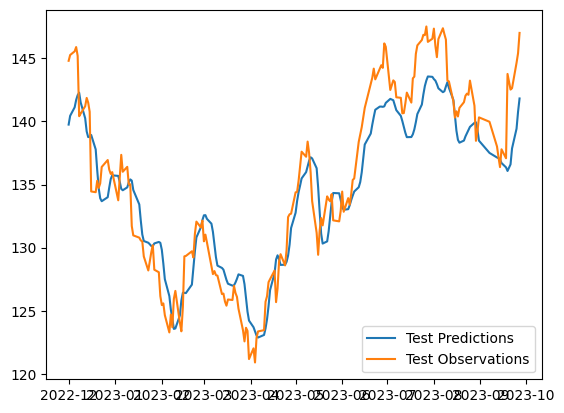

In [73]:
test_predictions = model5.predict(X3_test_norm).flatten()
#Inverse
test_predictions_orig = target_scaler.inverse_transform(test_predictions.reshape(-1,1))
y3_test_orig = target_scaler.inverse_transform(y3_test_norm.reshape(-1, 1))
#Plotting
plt.plot(test_df_indexes, test_predictions_orig)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Test Predictions', 'Test Observations'])

In [74]:
mse = mean_squared_error(y3_test_orig, test_predictions_orig)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y3_test_orig - test_predictions_orig))
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2.698070277122219
MAE: 2.231969528198242


Training Data With Val and Test Predictions.

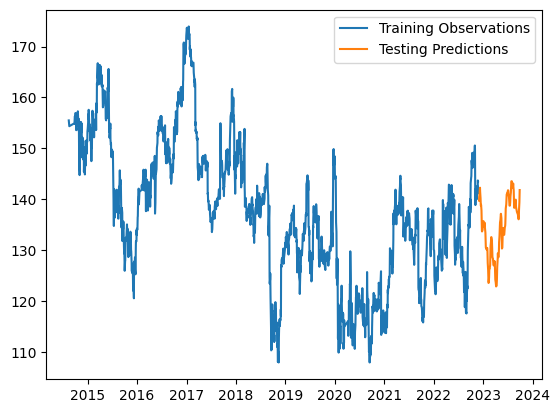

In [78]:
plt.plot(df.index[:2015], y3_train)
# plt.plot(df.index[1950:2019], val_predictions_orig)
plt.plot(test_df_indexes, test_predictions_orig)
plt.legend(['Training Observations',
            'Testing Predictions'])

Val and Test Predictions vs Actual Values

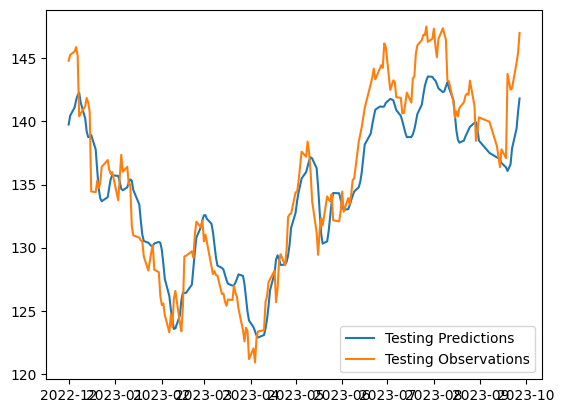

In [79]:
# plt.plot(df.index[1950:2019], val_predictions_orig)
# plt.plot(df.index[1950:2019], y3_val_orig)
plt.plot(test_df_indexes, test_predictions_orig)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Testing Predictions',
            'Testing Observations'])

Train Data and Val and Test Predictions along with Actual Values

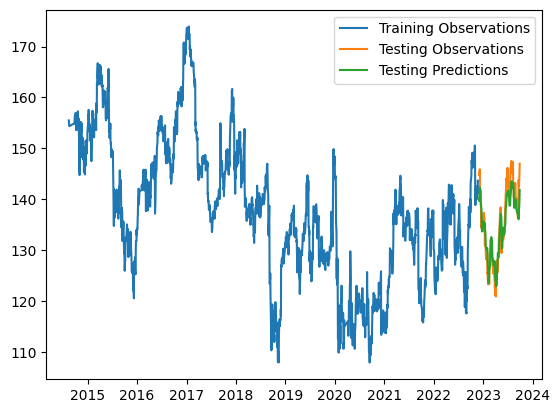

In [81]:
plt.plot(df.index[:2015], y3_train)
# plt.plot(df.index[1950:2019], val_predictions_orig)
# plt.plot(df.index[1950:2019], y3_val_orig)
plt.plot(test_df_indexes, y3_test_orig)
plt.plot(test_df_indexes, test_predictions_orig)
plt.legend(['Training Observations',
            'Testing Observations',
            'Testing Predictions',])

**ARIMA AND LSTM HYBRID MODEL**

In [90]:
#Importing Data into New variables.
arima_predictions = forecast_values
lstm_predictions = test_predictions_orig.flatten()

***Additive*** ***Method***

In [91]:
def create_additive_hybrid(arima_predictions, lstm_predictions):
    return (arima_predictions + lstm_predictions) / 2

In [92]:
Additive_Hybrid_model_predictions = create_additive_hybrid(arima_predictions, lstm_predictions)

In [93]:
Additive_Hybrid_model_predictions

,predicted_mean
2054,141.638913
2055,141.977929
2056,142.304615
2057,142.588149
2058,142.769066
...,...
2249,139.116298
2250,139.745269
2251,140.525760
2252,141.190582


Plot Predicted test vs actual test vaues

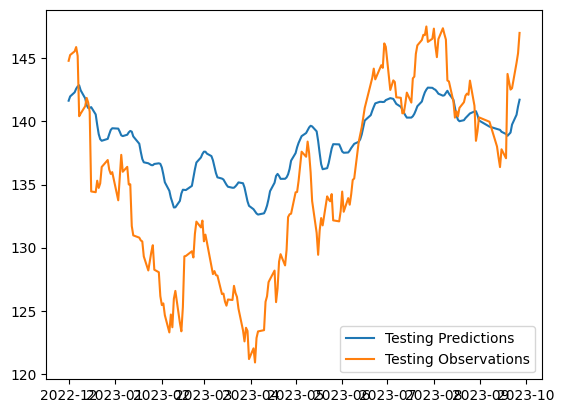

In [94]:
plt.plot(test_df_indexes, Additive_Hybrid_model_predictions)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Testing Predictions',
            'Testing Observations'])

Train test plotting

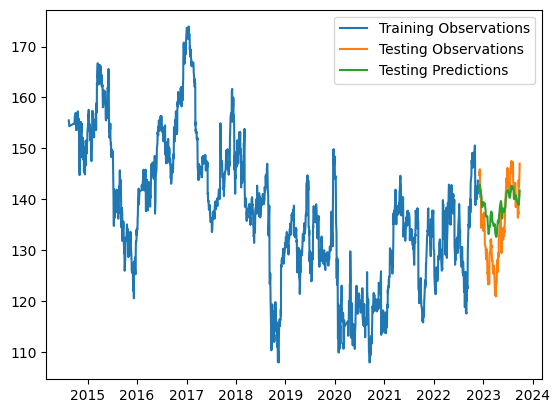

In [95]:
plt.plot(df.index[:2015], y3_train)
# plt.plot(df.index[1950:2019], val_predictions_orig)
# plt.plot(df.index[1950:2019], y3_val_orig)
plt.plot(test_df_indexes, y3_test_orig)
plt.plot(test_df_indexes, Additive_Hybrid_model_predictions)
plt.legend(['Training Observations',
            'Testing Observations',
            'Testing Predictions',])

In [97]:
mse = mean_squared_error(y3_test_orig, Additive_Hybrid_model_predictions)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y3_test_orig.flatten() - Additive_Hybrid_model_predictions))
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 5.757450016507435
MAE: 4.814194688623539


***Weighted Combination*** (Accuracy Based)

In [98]:
def create_weighted_hybrid(arima_predictions, lstm_predictions, y3_test_orig):

        # Calculate RMSE for both models
        arima_rmse = np.sqrt(mean_squared_error(y3_test_orig, arima_predictions))
        lstm_rmse = np.sqrt(mean_squared_error(y3_test_orig, lstm_predictions))

        # Calculate weights inversely proportional to RMSE
        total_error = (1/arima_rmse) + (1/lstm_rmse)
        arima_weight = (1/arima_rmse) / total_error
        lstm_weight = (1/lstm_rmse) / total_error

        # Return weighted predictions
        return arima_weight * arima_predictions + lstm_weight * lstm_predictions

In [99]:
Accuracy_based_weighted_hybrid_model = create_weighted_hybrid(arima_predictions, lstm_predictions, y3_test_orig)

In [100]:
Accuracy_based_weighted_hybrid_model

,predicted_mean
2054,140.526282
2055,141.075388
2056,141.604831
2057,142.065683
2058,142.363499
...,...
2249,137.634387
2250,138.635638
2251,139.877481
2252,140.935630


Plot Predicted test vs actual test vaues

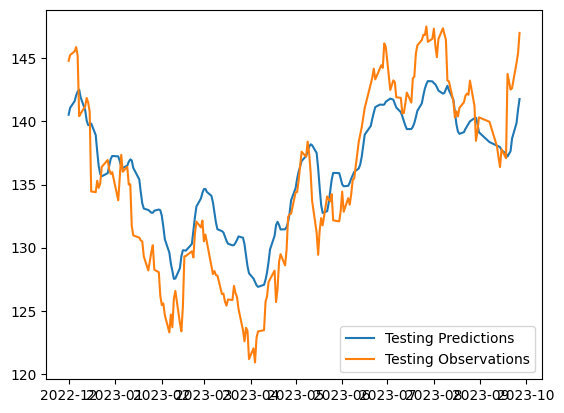

In [102]:
plt.plot(test_df_indexes, Accuracy_based_weighted_hybrid_model)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Testing Predictions',
            'Testing Observations'])

Train test Plotting

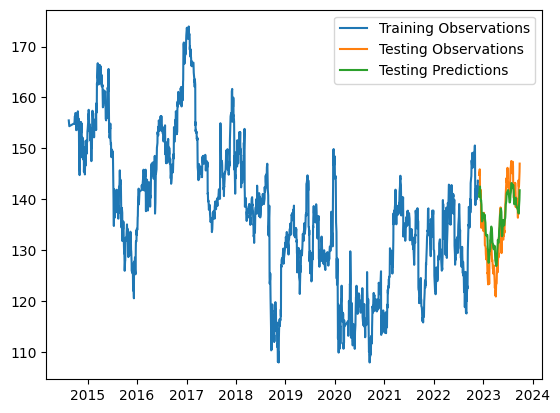

In [103]:
plt.plot(df.index[:2015], y3_train)
# plt.plot(df.index[1950:2019], val_predictions_orig)
# plt.plot(df.index[1950:2019], y3_val_orig)
plt.plot(test_df_indexes, y3_test_orig)
plt.plot(test_df_indexes, Accuracy_based_weighted_hybrid_model)
plt.legend(['Training Observations',
            'Testing Observations',
            'Testing Predictions',])

In [104]:
mse = mean_squared_error(y3_test_orig, Accuracy_based_weighted_hybrid_model)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y3_test_orig.flatten() - Accuracy_based_weighted_hybrid_model))
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 3.463861918154762
MAE: 2.8970757632226816


***Arima Residuals LSTM (Hybrid Model)***

In [129]:
# arima_train_pred = arima_result.predict(df['close_price'][:2019])

#     # Calculate residuals
# residuals = df['close_price'] - arima_train_pred

In [130]:
# residuals

In [131]:
# def prepare_residual_sequences(residuals, timesteps=30, n_features=13):
#     """
#     Prepare residuals into sequences for LSTM training
#     Similar to how you prepared your original LSTM data
#     """
#     # Convert residuals to numpy array if it's not already
#     residuals_array = np.array(residuals)

#     # Create sequences
#     X = []
#     y = []

#     for i in range(len(residuals_array) - timesteps):
#         # Create sequence of residuals
#         sequence = residuals_array[i:(i + timesteps)]
#         target = residuals_array[i + timesteps]

#         # Reshape sequence to match your LSTM input shape
#         # If you're using additional features, you'll need to modify this
#         sequence_reshaped = np.column_stack([sequence] + [np.zeros(len(sequence)) for _ in range(n_features - 1)])

#         X.append(sequence_reshaped)
#         y.append(target)

#     return np.array(X), np.array(y)

In [132]:
# X_train_residuals, y_train_residuals = prepare_residual_sequences(
#         residuals,
#         timesteps=30,
#         n_features=1
#     )

In [133]:
# residual_lstm = Sequential()
# residual_lstm.add(InputLayer((30, 1)))
# residual_lstm.add(LSTM(64, return_sequences=True))
# residual_lstm.add(Dropout(0.2))
# residual_lstm.add(LSTM(32, return_sequences=True))
# residual_lstm.add(Dropout(0.3))
# residual_lstm.add(LSTM(32))
# residual_lstm.add(Dropout(0.3))
# residual_lstm.add(Dense(16, activation='relu'))
# residual_lstm.add(Dense(8, activation='relu'))
# residual_lstm.add(Dense(1, activation='linear'))

# residual_lstm.compile(optimizer='adam', loss='mse')

In [134]:
# residual_lstm.compile(optimizer='adam', loss='mse')


In [135]:
# # residual_lstm.fit(X_train_residuals, residuals, epochs=20, batch_size=32)
# residual_lstm.fit(
#         X_train_residuals,
#         y_train_residuals,
#         epochs=50,
#         batch_size=32,
#         validation_split=0.2
#     )

In [136]:
# arima_test_pred = arima_result.predict(test_data.index)
# test_residuals = test_data['close_price'] - arima_test_pred

Plotting (Visuvalization)

Hybrid Model Predictions

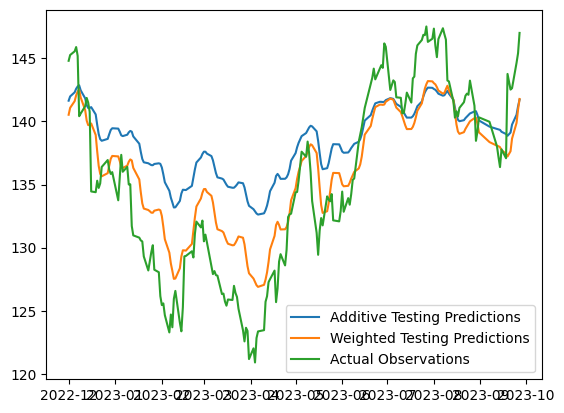

In [138]:
plt.plot(test_df_indexes, Additive_Hybrid_model_predictions)
plt.plot(test_df_indexes, Accuracy_based_weighted_hybrid_model)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Additive Testing Predictions',
           'Weighted Testing Predictions',
            'Actual Observations'])

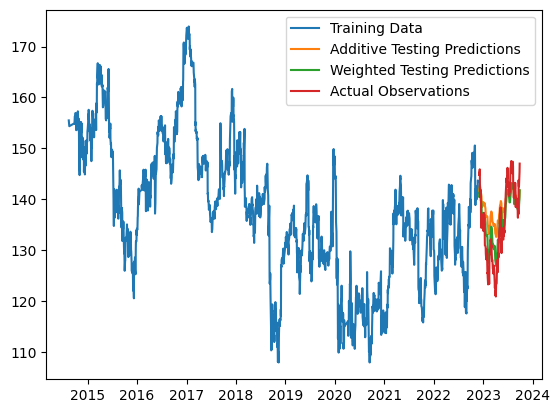

In [142]:
plt.plot(df.index[:2015], y3_train)
plt.plot(test_df_indexes, Additive_Hybrid_model_predictions)
plt.plot(test_df_indexes, Accuracy_based_weighted_hybrid_model)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Training Data',
            'Additive Testing Predictions',
           'Weighted Testing Predictions',
            'Actual Observations'])

Arima V/s LSTM V/s Hybrid (Both)

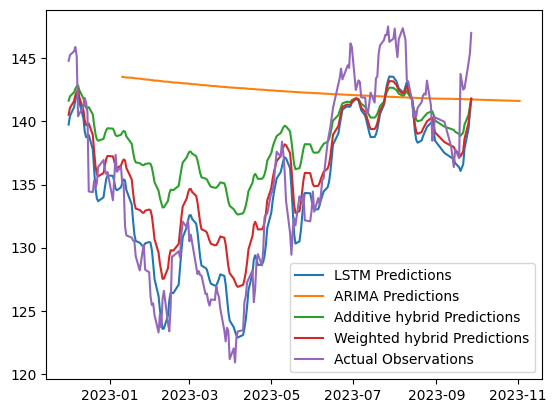

In [143]:
plt.plot(test_df_indexes, test_predictions_orig)
plt.plot(test.index, forecast_values,)
plt.plot(test_df_indexes, Additive_Hybrid_model_predictions)
plt.plot(test_df_indexes, Accuracy_based_weighted_hybrid_model)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['LSTM Predictions',
            'ARIMA Predictions',
           'Additive hybrid Predictions',
           'Weighted hybrid Predictions',
            'Actual Observations'])

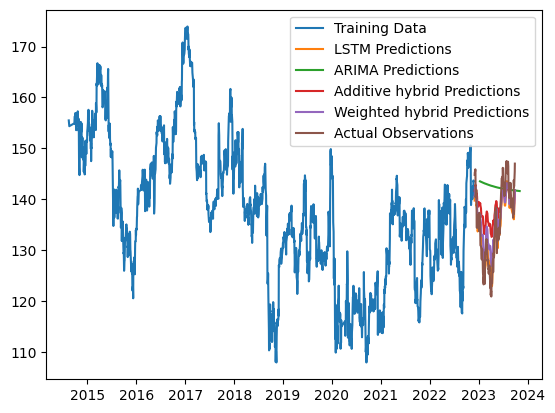

In [144]:
plt.plot(df.index[:2015], y3_train)
plt.plot(test_df_indexes, test_predictions_orig)
plt.plot(test.index, forecast_values,)
plt.plot(test_df_indexes, Additive_Hybrid_model_predictions)
plt.plot(test_df_indexes, Accuracy_based_weighted_hybrid_model)
plt.plot(test_df_indexes, y3_test_orig)
plt.legend(['Training Data',
            'LSTM Predictions',
            'ARIMA Predictions',
           'Additive hybrid Predictions',
           'Weighted hybrid Predictions',
            'Actual Observations'])

All the RMSE and MAE scores of each model are calculated near after their testing phase.